In [ ]:
!pip install ultralytics opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.3 MB/s eta 0:00:00


Loading YOLOv8 model...
Model loaded successfully.

Image found. Running detection...


0: 640x640 9 cars, 1 bus, 2 trucks, 390.8ms
Speed: 23.5ms preprocess, 390.8ms inference, 32.0ms postprocess per image at shape (1, 3, 640, 640)


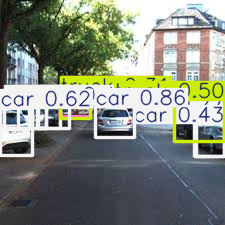

Detected Objects:
- car
- car
- truck
- car
- car
- car
- truck
- car
- car
- bus
- car
- car

Total Objects Detected: 12

Output saved as detected_car.jpg


In [ ]:
# AI-Based Object Detection using YOLOv8

from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
import os

print("Loading YOLOv8 model...")
model = YOLO("yolov8n.pt")
print("Model loaded successfully.\n")

image_path = "/content/car.jpg"

# Check if file exists
if not os.path.exists(image_path):
    print("Image not found. Please check file name.")
else:
    print("Image found. Running detection...\n")

    image = cv2.imread(image_path)

    results = model(image)

    annotated_frame = results[0].plot()

    # Display result
    cv2_imshow(annotated_frame)

    # Save result
    output_path = "/content/detected_car.jpg"
    cv2.imwrite(output_path, annotated_frame)

    boxes = results[0].boxes
    class_ids = boxes.cls.tolist()

    print("Detected Objects:")
    for class_id in class_ids:
        print("-", model.names[int(class_id)])

    print("\nTotal Objects Detected:", len(class_ids))
    print("\nOutput saved as detected_car.jpg")
